In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import xgboost as xgb

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [75]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Define the correct path to your folder
folder_path = "/content/drive/MyDrive/SCRIPTS R - PYTHON/CAPSTONE/Datasets"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
h1n1_data = folder_path + '/Final_h1n1_fulldataset_CLEANED_Labels.csv'

In [77]:
# Loading the data set
h1n1_data = pd.read_csv(h1n1_data)

In [78]:
h1n1_data.dtypes

,0
Unnamed: 0,int64
h1n1_concern,int64
h1n1_knowledge,int64
behavioral_antiviral_meds,int64
behavioral_avoidance,int64
behavioral_face_mask,int64
behavioral_wash_hands,int64
behavioral_large_gatherings,int64
behavioral_outside_home,int64
behavioral_touch_face,int64


# Initial run - 25 variables (without target)

In [79]:
h1n1_data = h1n1_data.drop(columns = ['Unnamed: 0',
                                      'behavioral_avoidance',
                                      'behavioral_large_gatherings',
                                      'behavioral_touch_face',
                                      'child_under_6_months',
                                      'health_worker',
                                      'rent_or_own',
                                      'employment_status',
                                      'census_msa',
                                      'household_adults',
                                      'employment_occupation'])

In [80]:
h1n1_data.dtypes

,0
h1n1_concern,int64
h1n1_knowledge,int64
behavioral_antiviral_meds,int64
behavioral_face_mask,int64
behavioral_wash_hands,int64
behavioral_outside_home,int64
doctor_recc_h1n1,int64
doctor_recc_seasonal,int64
chronic_med_condition,int64
health_insurance,int64


In [81]:
# Separating features from target variable in the dataset
# h1n1_vaccine and seasonal_vaccine are excluded as Vaccination_General has a combination of both variables

X_h1n1_data = h1n1_data.drop(columns = ['h1n1_vaccine',
                                        'seasonal_vaccine',
                                        'Vaccination_General'])
Y_h1n1_data = h1n1_data.loc[:, 'Vaccination_General']

In [82]:
X, y = X_h1n1_data, Y_h1n1_data

# Getting dummies for categoricala data
X = pd.get_dummies(X_h1n1_data)

In [83]:
# Fix column names BEFORE splitting to prevent issues with XGBoost
X.columns = X.columns.astype(str).str.replace(r"[\[\]<>]", "", regex=True)

# Splitting data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=Y_h1n1_data
)

In [84]:
# Defining the XGBoost model with regularization to avoid overfitting
model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='auc',
    max_depth=4,
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1,
    seed=42
)

# Fitting the model using early stopping on validation set
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    #early_stopping_rounds=10,
    verbose=True
)

[0]	validation_0-auc:0.78533
[1]	validation_0-auc:0.79617


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:36:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-auc:0.80110
[3]	validation_0-auc:0.80793
[4]	validation_0-auc:0.80869
[5]	validation_0-auc:0.81101
[6]	validation_0-auc:0.81237
[7]	validation_0-auc:0.81191
[8]	validation_0-auc:0.81322
[9]	validation_0-auc:0.81338
[10]	validation_0-auc:0.81351
[11]	validation_0-auc:0.81508
[12]	validation_0-auc:0.81562
[13]	validation_0-auc:0.81567
[14]	validation_0-auc:0.81581
[15]	validation_0-auc:0.81630
[16]	validation_0-auc:0.81682
[17]	validation_0-auc:0.81768
[18]	validation_0-auc:0.81803
[19]	validation_0-auc:0.81844
[20]	validation_0-auc:0.81855
[21]	validation_0-auc:0.81906
[22]	validation_0-auc:0.81954
[23]	validation_0-auc:0.81965
[24]	validation_0-auc:0.82006
[25]	validation_0-auc:0.82031
[26]	validation_0-auc:0.82054
[27]	validation_0-auc:0.82096
[28]	validation_0-auc:0.82121
[29]	validation_0-auc:0.82138
[30]	validation_0-auc:0.82145
[31]	validation_0-auc:0.82177
[32]	validation_0-auc:0.82213
[33]	validation_0-auc:0.82248
[34]	validation_0-auc:0.82282
[35]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [85]:
# Predicting on test set

y_proba = model.predict_proba(X_test) # Predict class probabilities (for all classes) for AUC
y_pred = model.predict(X_test) # Predict class labels for Accuracy or Confusion Matrix

In [86]:
y_test.unique()

array([0, 2, 1, 3])

In [87]:
# Prediction Results Preview - 25 variable model

# Convert X_test to DataFrame if not already
X_test_df = pd.DataFrame(X_test, columns=X_train.columns).reset_index(drop=True)

# Create DataFrame with prediction probabilities
proba_df = pd.DataFrame(y_proba, columns=[f'Prob_Class_{i}' for i in range(y_proba.shape[1])])

# Add predicted and actual class
proba_df['Predicted_Class'] = y_pred
proba_df['Actual_Class'] = y_test.reset_index(drop=True)

# Merge with test features
full_results_25 = pd.concat([X_test_df, proba_df], axis=1)

# Tagging the model in a new column
full_results_25['Model'] = '25_variable_model'

# Preview the first rows
full_results_25.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_insurance,...,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,Prob_Class_0,Prob_Class_1,Prob_Class_2,Prob_Class_3,Predicted_Class,Actual_Class,Model
0,2,2,0,0,1,0,0,0,0,1,...,False,False,False,0.394836,0.075500,0.179190,0.350474,0,0,25_variable_model
1,2,2,0,0,1,0,1,1,1,1,...,False,False,False,0.103203,0.043668,0.286879,0.566250,3,2,25_variable_model
2,0,1,1,0,1,0,1,1,1,1,...,False,False,False,0.451823,0.062524,0.166858,0.318795,0,1,25_variable_model
3,0,2,0,0,0,0,0,0,0,1,...,False,False,False,0.901862,0.017724,0.055368,0.025047,0,0,25_variable_model
4,2,2,0,0,1,0,0,0,0,1,...,False,False,False,0.433532,0.083065,0.182383,0.301021,0,3,25_variable_model


In [88]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np

# Model Evaluation Metrics
auc = roc_auc_score(y_test, y_proba, multi_class='ovr') # We add multi_class='ovr' or ='ovo' as our target variable has more than 2 classes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Summary
print("\nFinal Tuned Model Performance")
print(f"AUC Score          : {auc:.4f}")
print(f"Accuracy Score     : {accuracy:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = sorted(np.unique(y_test))

conf_df = pd.DataFrame(
    data=conf_matrix,
    index=[f"Actual {label}" for label in class_labels],
    columns=[f"Predicted {label}" for label in class_labels]
)

print("\nLabeled Confusion Matrix:")
display(conf_df)  # or print(conf_df) if display() is not available

# Sensitivity (Recall) and Specificity per class
sensitivities = {}
specificities = {}

for i, label in enumerate(class_labels):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivities[label] = round(sensitivity, 4)
    specificities[label] = round(specificity, 4)

print("\nSensitivity (Recall) per class:")
for label, value in sensitivities.items():
    print(f"Class {label}: {value}")

print("\nSpecificity per class:")
for label, value in specificities.items():
    print(f"Class {label}: {value}")



Final Tuned Model Performance
AUC Score          : 0.8178
Accuracy Score     : 0.6820
Precision          : 0.6621
Recall             : 0.6820
F1 Score           : 0.6622

Labeled Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,3450,9,383,147
Actual 1,210,6,24,53
Actual 2,820,3,1273,226
Actual 3,396,5,272,736



Sensitivity (Recall) per class:
Class 0: 0.8649
Class 1: 0.0205
Class 2: 0.5482
Class 3: 0.5224

Specificity per class:
Class 0: 0.6456
Class 1: 0.9978
Class 2: 0.8807
Class 3: 0.9355


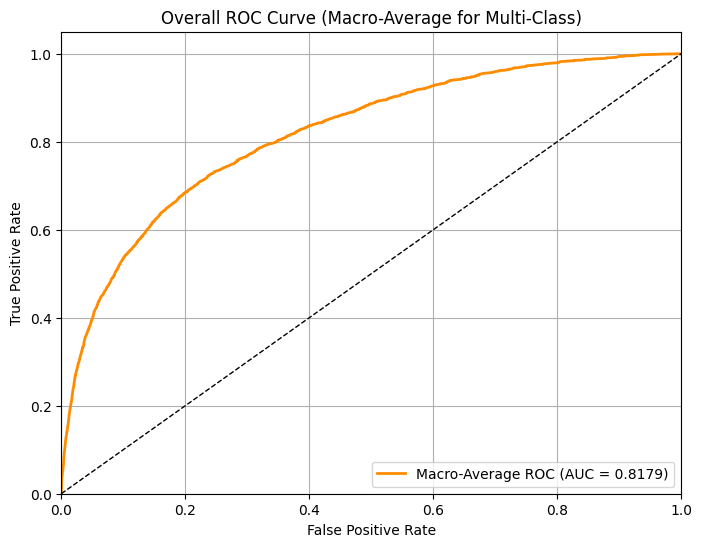

In [89]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# 1. Binarize the target for multi-class
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = model.predict_proba(X_test)

# 2. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3. Compute macro-average ROC curve and AUC (this matches 'multi_class=ovr')
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)

macro_auc = auc(all_fpr, mean_tpr)

# 4. Plot the macro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, label=f'Macro-Average ROC (AUC = {macro_auc:.4f})', color='darkorange', lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve (Macro-Average for Multi-Class)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


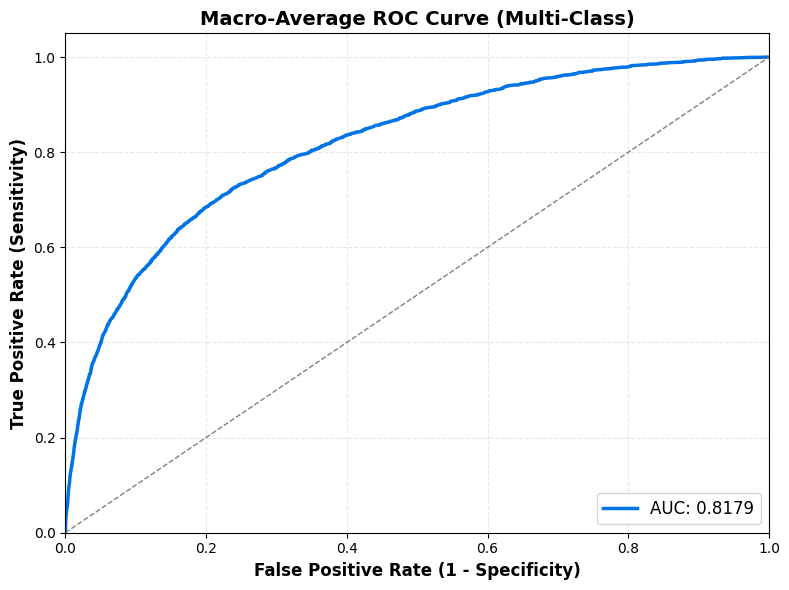

In [90]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# 1. Binarize the target for multi-class
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = model.predict_proba(X_test)

# 2. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3. Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

# 4. Styled plot (aesthetic upgrade only)
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='#0073e6', lw=2.5, label=f'AUC: {macro_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight='bold', fontsize=12)
plt.title('Macro-Average ROC Curve (Multi-Class)', fontsize=14, fontweight='bold')

plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


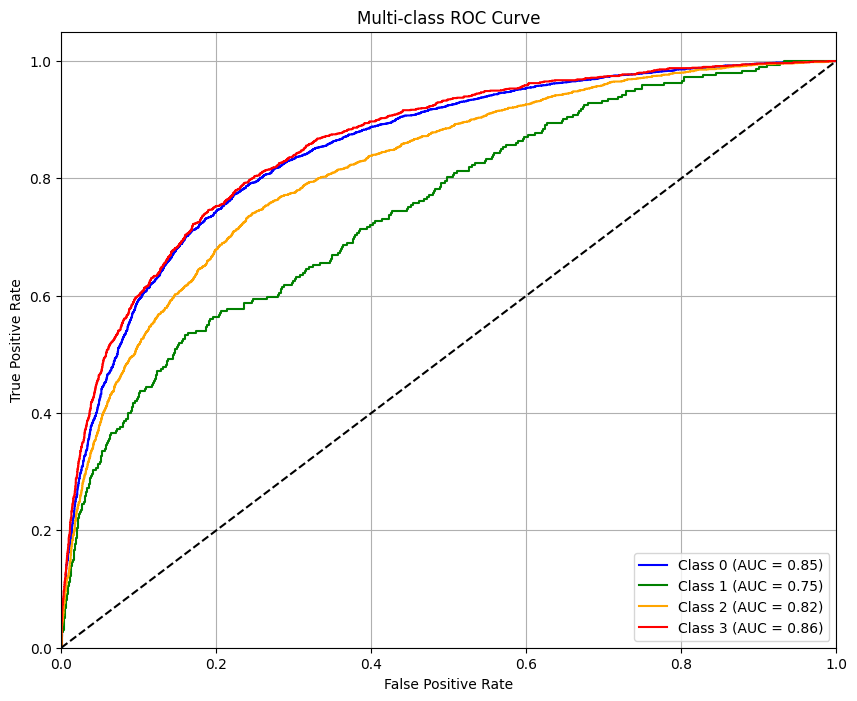

In [91]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Step 1: Binarize the target (for multi-class ROC)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Step 2: Predict probabilities for all classes
y_score = model.predict_proba(X_test)

# Step 3: Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


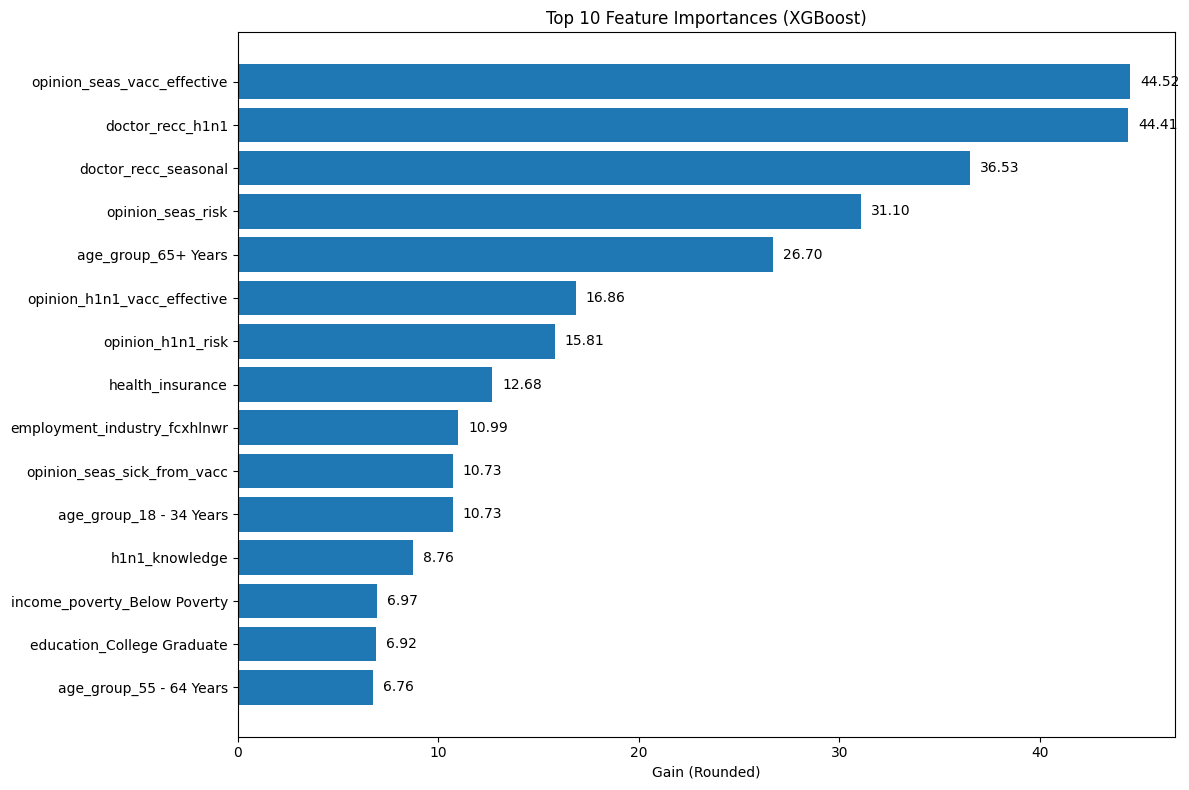

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances (gain-based)
importance_dict = model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame and sort by importance
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Round importance values to 2 decimal places
importance_df['Importance'] = importance_df['Importance'].round(2)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1])
plt.xlabel("Gain (Rounded)")
plt.title("Top 10 Feature Importances (XGBoost)")

# Annotate bars with values
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()


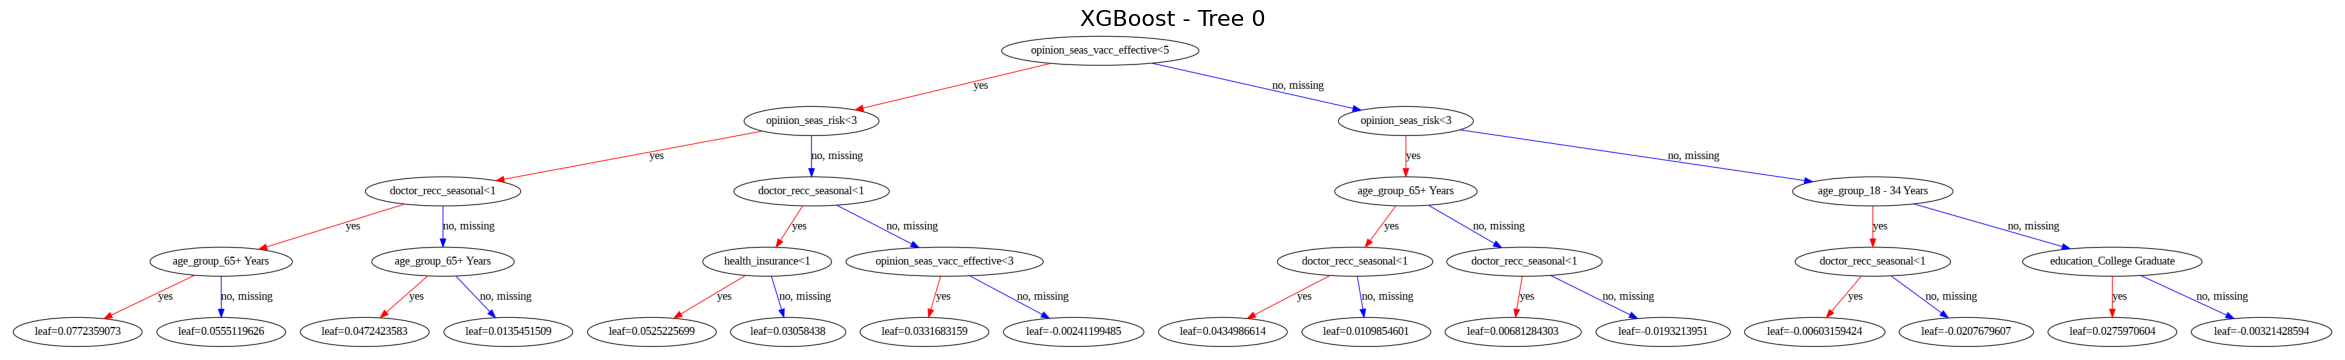

In [93]:
# Create a large figure and plot the tree
fig, ax = plt.subplots(figsize=(30, 20))  # Increase width and height
xgb.plot_tree(model, num_trees=0, ax=ax)  # Plot tree on custom axes
plt.title("XGBoost - Tree 0", fontsize=16)

# Save the figure as a PNG file
plt.savefig("xgboost_tree_0.png", dpi=300, bbox_inches='tight')

# Show the figure in the notebook
plt.show()

# Final run - 14 variables (without target)

In [94]:
# Loading the data set

h1n1_data = folder_path + '/balanced_flu_labels.train.csv'
h1n1_data = pd.read_csv(h1n1_data)

In [95]:
h1n1_data = h1n1_data.loc[: , ['doctor_recc_h1n1',
                   'doctor_recc_seasonal',
                   'health_insurance',
                   'opinion_h1n1_risk',
                   'opinion_seas_vacc_effective',
                   'opinion_seas_risk',
                   'age_group',
                   'employment_industry',
                   'h1n1_concern',
                   'h1n1_knowledge',
                   'chronic_med_condition',
                   'race',
                   'sex',
                   'income_poverty',
                   'Vaccination_General']]

In [96]:
h1n1_data.dtypes

,0
doctor_recc_h1n1,int64
doctor_recc_seasonal,int64
health_insurance,int64
opinion_h1n1_risk,int64
opinion_seas_vacc_effective,int64
opinion_seas_risk,int64
age_group,object
employment_industry,object
h1n1_concern,int64
h1n1_knowledge,int64


In [97]:
# Separating features from target variable in the dataset
# h1n1_vaccine and seasonal_vaccine are excluded as Vaccination_General has a combination of both variables

X_h1n1_data = h1n1_data.drop(columns = ['Vaccination_General'])
Y_h1n1_data = h1n1_data.loc[:, 'Vaccination_General']

In [98]:
X, y = X_h1n1_data, Y_h1n1_data

# Getting dummies for categoricala data
X = pd.get_dummies(X_h1n1_data)

In [99]:
# Fix column names BEFORE splitting to prevent issues with XGBoost
X.columns = X.columns.astype(str).str.replace(r"[\[\]<>]", "", regex=True)

# Splitting data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=Y_h1n1_data
)

In [100]:
# Defining the XGBoost model with regularization to avoid overfitting
model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='auc',
    max_depth=4,
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1,
    seed=42
)

# Fitting the model using early stopping on validation set
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    #early_stopping_rounds=10,
    verbose=True
)

[0]	validation_0-auc:0.74856
[1]	validation_0-auc:0.76713


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:36:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-auc:0.77688
[3]	validation_0-auc:0.77903
[4]	validation_0-auc:0.78192
[5]	validation_0-auc:0.78601
[6]	validation_0-auc:0.78644
[7]	validation_0-auc:0.78730
[8]	validation_0-auc:0.78822
[9]	validation_0-auc:0.78927
[10]	validation_0-auc:0.78954
[11]	validation_0-auc:0.78957
[12]	validation_0-auc:0.79016
[13]	validation_0-auc:0.79082
[14]	validation_0-auc:0.79094
[15]	validation_0-auc:0.79165
[16]	validation_0-auc:0.79261
[17]	validation_0-auc:0.79302
[18]	validation_0-auc:0.79327
[19]	validation_0-auc:0.79343
[20]	validation_0-auc:0.79369
[21]	validation_0-auc:0.79396
[22]	validation_0-auc:0.79475
[23]	validation_0-auc:0.79517
[24]	validation_0-auc:0.79565
[25]	validation_0-auc:0.79591
[26]	validation_0-auc:0.79632
[27]	validation_0-auc:0.79668
[28]	validation_0-auc:0.79734
[29]	validation_0-auc:0.79752
[30]	validation_0-auc:0.79803
[31]	validation_0-auc:0.79872
[32]	validation_0-auc:0.79918
[33]	validation_0-auc:0.79993
[34]	validation_0-auc:0.80030
[35]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [101]:
# Predicting on test set

y_proba = model.predict_proba(X_test) # Predict class probabilities (for all classes) for AUC
y_pred = model.predict(X_test) # Predict class labels for Accuracy or Confusion Matrix

In [102]:
y_test.unique()

array([2, 0, 3, 1])

In [103]:
# Prediction Results Preview - 14 variable model

# Convert X_test to DataFrame if not already
X_test_df = pd.DataFrame(X_test, columns=X_train.columns).reset_index(drop=True)

# Create DataFrame with prediction probabilities
proba_df = pd.DataFrame(y_proba, columns=[f'Prob_Class_{i}' for i in range(y_proba.shape[1])])

# Add predicted and actual class
proba_df['Predicted_Class'] = y_pred
proba_df['Actual_Class'] = y_test.reset_index(drop=True)

# Merge with test features
full_results_14 = pd.concat([X_test_df, proba_df], axis=1)

# Tagging the model in a new column
full_results_14['Model'] = '14_variable_model'

# Preview the first rows
full_results_14.head()

,doctor_recc_h1n1,doctor_recc_seasonal,health_insurance,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_concern,h1n1_knowledge,chronic_med_condition,age_group_18 - 34 Years,...,"income_poverty_= $75,000, Above Poverty","income_poverty_ $75,000",income_poverty_Below Poverty,Prob_Class_0,Prob_Class_1,Prob_Class_2,Prob_Class_3,Predicted_Class,Actual_Class,Model
0,0,1,1,3,1,2,1,1,1,False,...,True,False,False,0.275311,0.063757,0.561592,0.099340,2,2,14_variable_model
1,0,0,0,4,5,2,3,1,0,False,...,False,True,False,0.270183,0.272396,0.286305,0.171116,2,0,14_variable_model
2,1,1,1,2,5,4,2,2,0,False,...,True,False,False,0.055277,0.116520,0.208032,0.620171,3,3,14_variable_model
3,0,0,1,2,4,5,2,2,0,False,...,False,True,False,0.131820,0.229261,0.248899,0.390020,3,3,14_variable_model
4,0,0,1,4,2,2,2,1,0,False,...,False,True,False,0.261734,0.514774,0.098077,0.125415,1,1,14_variable_model


In [104]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np

# Model Evaluation Metrics
auc = roc_auc_score(y_test, y_proba, multi_class='ovr') # We add multi_class='ovr' or ='ovo' as our target variable has more than 2 classes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Summary
print("\n14 Variable Model Performance")
print(f"AUC Score          : {auc:.4f}")
print(f"Accuracy Score     : {accuracy:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = sorted(np.unique(y_test))

conf_df = pd.DataFrame(
    data=conf_matrix,
    index=[f"Actual {label}" for label in class_labels],
    columns=[f"Predicted {label}" for label in class_labels]
)

print("\nLabeled Confusion Matrix:")
display(conf_df)  # or print(conf_df) if display() is not available

# Sensitivity (Recall) and Specificity per class
sensitivities = {}
specificities = {}

for i, label in enumerate(class_labels):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivities[label] = round(sensitivity, 4)
    specificities[label] = round(specificity, 4)

print("\nSensitivity (Recall) per class:")
for label, value in sensitivities.items():
    print(f"Class {label}: {value}")

print("\nSpecificity per class:")
for label, value in specificities.items():
    print(f"Class {label}: {value}")



14 Variable Model Performance
AUC Score          : 0.8201
Accuracy Score     : 0.5786
Precision          : 0.5825
Recall             : 0.5786
F1 Score           : 0.5777

Labeled Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,1765,338,448,226
Actual 1,670,1377,322,408
Actual 2,498,175,1567,537
Actual 3,296,298,465,1718



Sensitivity (Recall) per class:
Class 0: 0.6356
Class 1: 0.4959
Class 2: 0.5643
Class 3: 0.6187

Specificity per class:
Class 0: 0.8243
Class 1: 0.9027
Class 2: 0.8518
Class 3: 0.8594


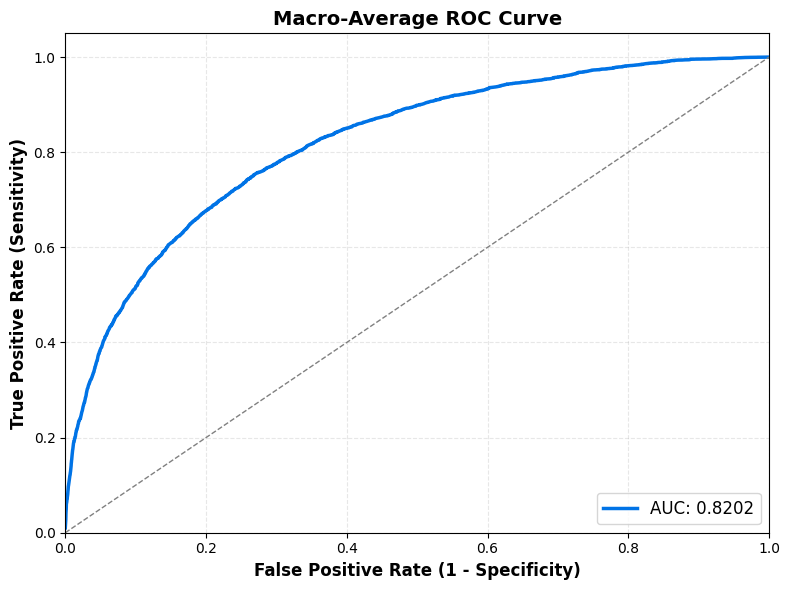

In [105]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# 1. Binarize the target for multi-class
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = model.predict_proba(X_test)

# 2. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3. Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

# 4. Styled Plot (matching the reference)
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='#0073e6', lw=2.5, label=f'AUC: {macro_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight='bold', fontsize=12)
plt.title('Macro-Average ROC Curve', fontsize=14, fontweight='bold')

plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


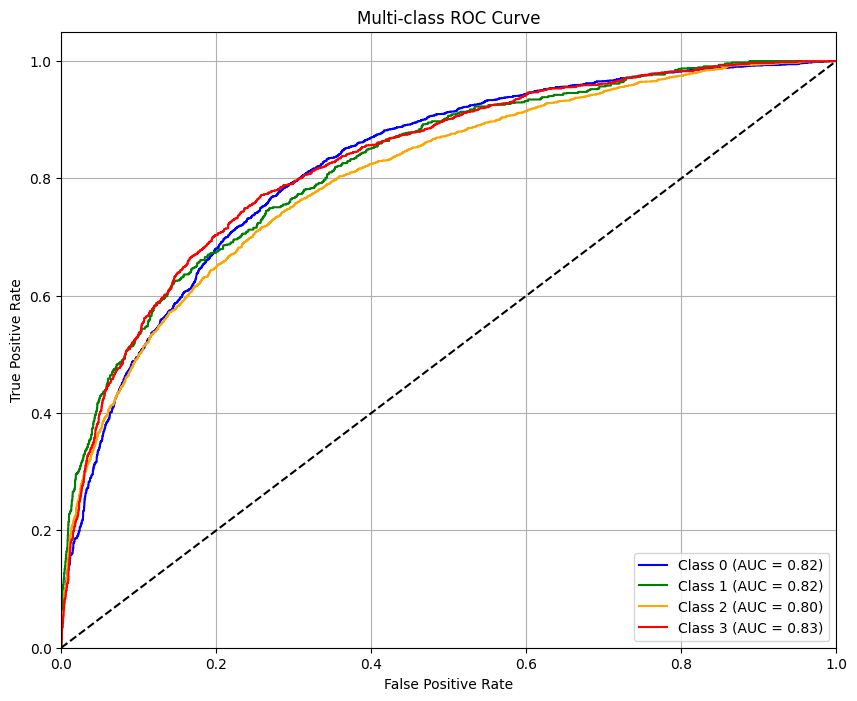

In [106]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Step 1: Binarize the target (for multi-class ROC)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Step 2: Predict probabilities for all classes
y_score = model.predict_proba(X_test)

# Step 3: Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


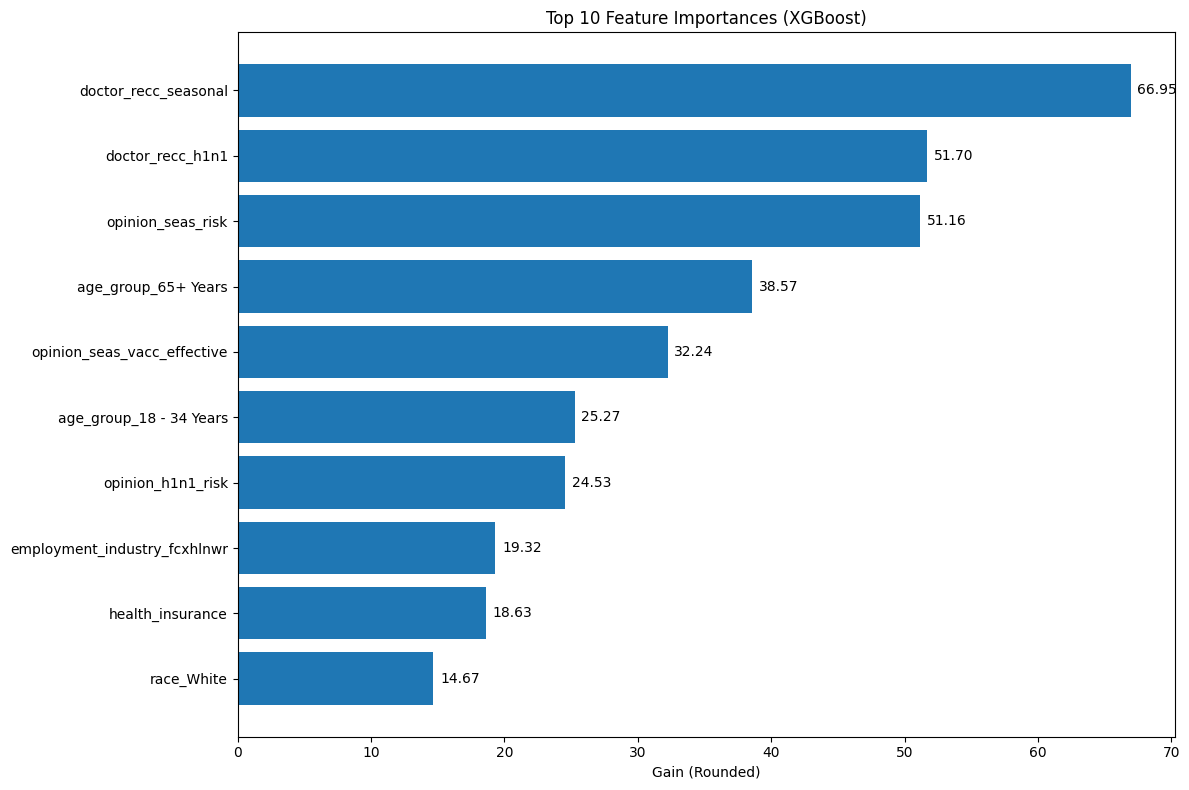

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances (gain-based)
importance_dict = model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame and sort by importance
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Round importance values to 2 decimal places
importance_df['Importance'] = importance_df['Importance'].round(2)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1])
plt.xlabel("Gain (Rounded)")
plt.title("Top 10 Feature Importances (XGBoost)")

# Annotate bars with values
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()


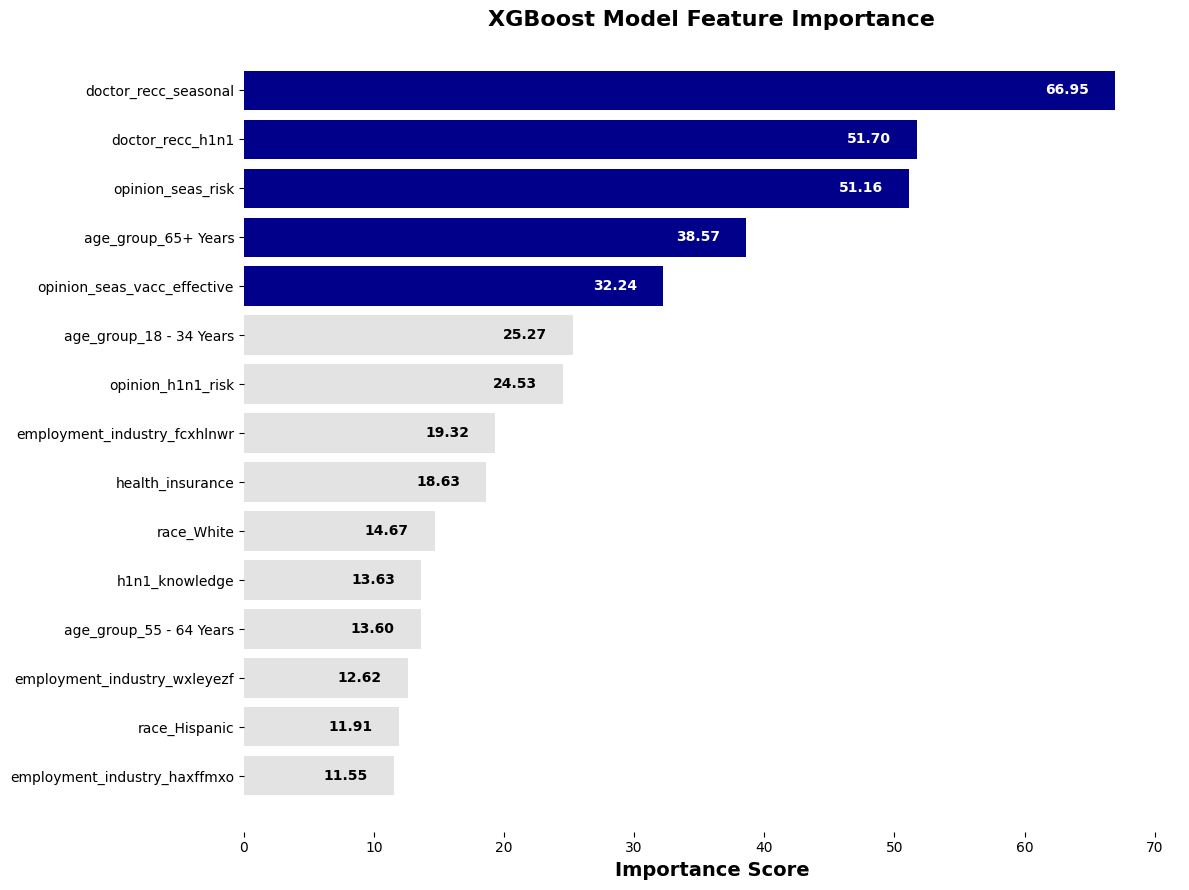

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importance_dict = model.get_booster().get_score(importance_type='gain')

# Convert and process
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)
importance_df['Importance'] = importance_df['Importance'].round(2)
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Assign colors
colors = []
for i in range(len(importance_df)):
    if i >= len(importance_df) - 5:
        colors.append('darkblue')  # Top 5: dark blue
    else:
        colors.append('#B0B0B059')  # Bottom 10: light gray with ~35% opacity

# Plot
fig, ax = plt.subplots(figsize=(12, 9))
bars = ax.barh(importance_df['Feature'], importance_df['Importance'], color=colors)

# Style axes
ax.set_xlabel("Importance Score", fontsize=14, fontweight='bold')
ax.set_title("XGBoost Model Feature Importance", fontsize=16, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0)  # Removed vertical gridlines

# Remove borders
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Annotate bars
max_width = importance_df['Importance'].max()
for i, bar in enumerate(bars):
    width = bar.get_width()
    xpos = width - 2 if width > 5 else width + 0.3
    align = 'right' if width > 5 else 'left'
    text_color = 'white' if i >= len(importance_df) - 5 else 'black'
    ax.text(xpos, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}', va='center', ha=align,
            fontsize=10, fontweight='bold', color=text_color)

ax.set_xlim(0, max_width + 5)
plt.tight_layout()
plt.show()


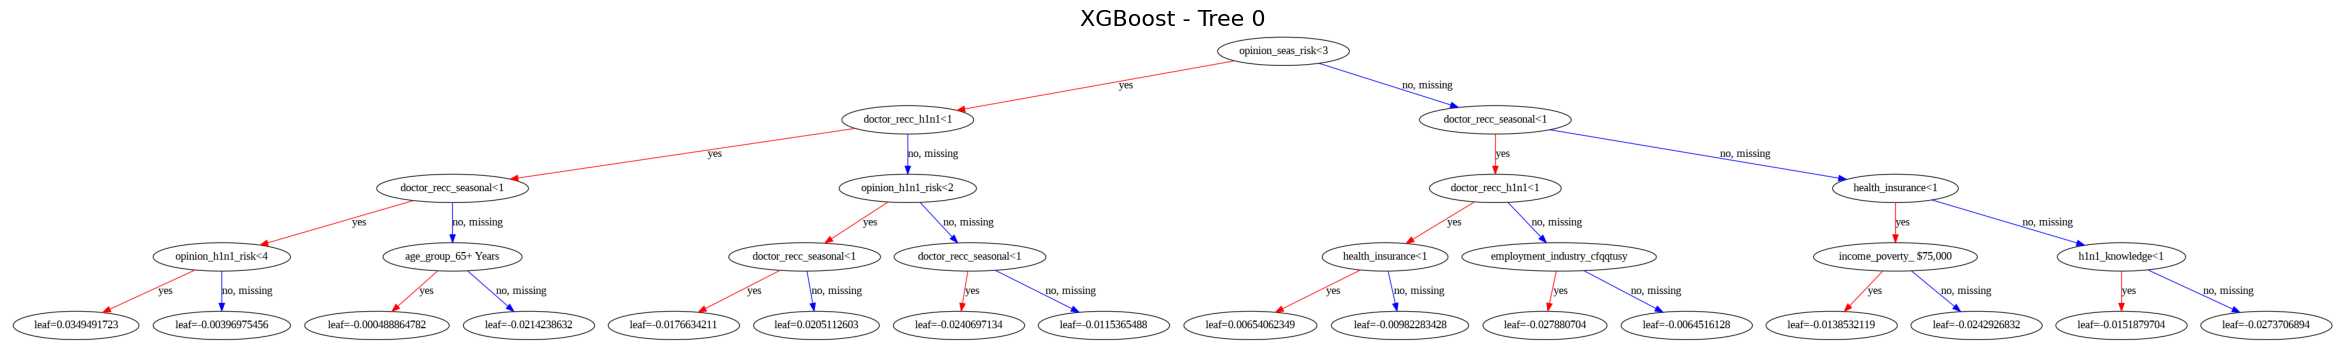

In [109]:
# Create a large figure and plot the tree
fig, ax = plt.subplots(figsize=(30, 20))  # Increase width and height
xgb.plot_tree(model, num_trees=0, ax=ax)  # Plot tree on custom axes
plt.title("XGBoost - Tree 0", fontsize=16)

# Save the figure as a PNG file
plt.savefig("xgboost_tree_0.png", dpi=300, bbox_inches='tight')

# Show the figure in the notebook
plt.show()

# Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the base model
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    seed=42
)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc_ovr',  # multiclass AUC (one-vs-rest)
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score :", grid_search.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best AUC Score : 0.8714796764797083


# Optimized Model

In [111]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

# 1. Define the best XGBoost model from grid search
model = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=150,
    subsample=0.8,
    colsample_bytree=1,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# 2. Fit the model
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# 3. Predict class labels and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

[0]	validation_0-auc:0.78443


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:42:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-auc:0.78757
[2]	validation_0-auc:0.78931
[3]	validation_0-auc:0.79457
[4]	validation_0-auc:0.79629
[5]	validation_0-auc:0.79793
[6]	validation_0-auc:0.79923
[7]	validation_0-auc:0.80050
[8]	validation_0-auc:0.80288
[9]	validation_0-auc:0.80403
[10]	validation_0-auc:0.80563
[11]	validation_0-auc:0.80613
[12]	validation_0-auc:0.80693
[13]	validation_0-auc:0.80882
[14]	validation_0-auc:0.81027
[15]	validation_0-auc:0.81144
[16]	validation_0-auc:0.81275
[17]	validation_0-auc:0.81391
[18]	validation_0-auc:0.81489
[19]	validation_0-auc:0.81610
[20]	validation_0-auc:0.81727
[21]	validation_0-auc:0.81837
[22]	validation_0-auc:0.81946
[23]	validation_0-auc:0.82048
[24]	validation_0-auc:0.82153
[25]	validation_0-auc:0.82259
[26]	validation_0-auc:0.82346
[27]	validation_0-auc:0.82427
[28]	validation_0-auc:0.82497
[29]	validation_0-auc:0.82578
[30]	validation_0-auc:0.82650
[31]	validation_0-auc:0.82745
[32]	validation_0-auc:0.82808
[33]	validation_0-auc:0.82890
[34]	validation_0-a

In [112]:
# Prediction Results Preview - tuned model

X_test_df = pd.DataFrame(X_test, columns=X_train.columns).reset_index(drop=True)
proba_df = pd.DataFrame(y_proba, columns=[f'Prob_Class_{i}' for i in range(y_proba.shape[1])])
proba_df['Predicted_Class'] = y_pred
proba_df['Actual_Class'] = y_test.reset_index(drop=True)

full_results_tuned = pd.concat([X_test_df, proba_df], axis=1)
full_results_tuned['Model'] = 'Tuned_Model'

# Preview (optional)
full_results_tuned.head()

,doctor_recc_h1n1,doctor_recc_seasonal,health_insurance,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_concern,h1n1_knowledge,chronic_med_condition,age_group_18 - 34 Years,...,"income_poverty_= $75,000, Above Poverty","income_poverty_ $75,000",income_poverty_Below Poverty,Prob_Class_0,Prob_Class_1,Prob_Class_2,Prob_Class_3,Predicted_Class,Actual_Class,Model
0,0,1,1,3,1,2,1,1,1,False,...,True,False,False,0.359109,0.004207,0.620725,0.015959,2,2,Tuned_Model
1,0,0,0,4,5,2,3,1,0,False,...,False,True,False,0.276749,0.169371,0.314366,0.239514,2,0,Tuned_Model
2,1,1,1,2,5,4,2,2,0,False,...,True,False,False,0.034377,0.098651,0.147458,0.719514,3,3,Tuned_Model
3,0,0,1,2,4,5,2,2,0,False,...,False,True,False,0.049008,0.147786,0.269722,0.533484,3,3,Tuned_Model
4,0,0,1,4,2,2,2,1,0,False,...,False,True,False,0.333135,0.550398,0.058575,0.057892,1,1,Tuned_Model


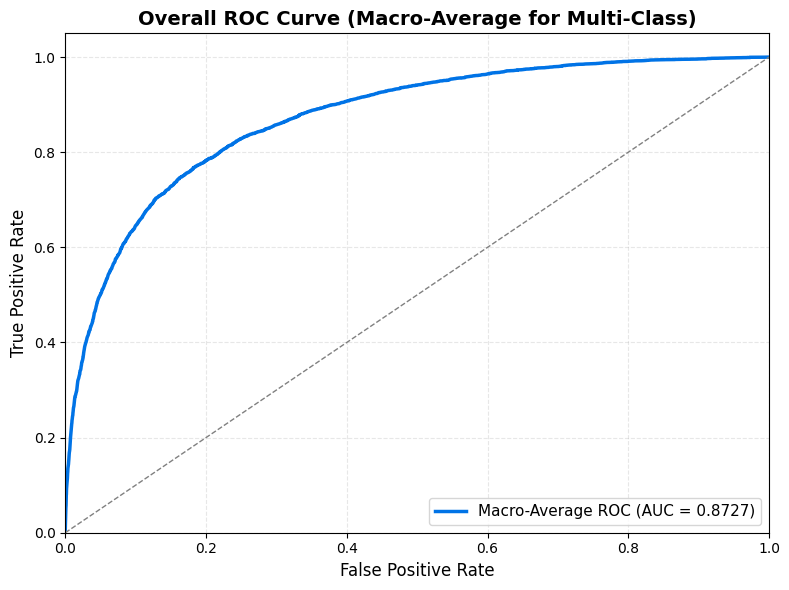

In [113]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# 1. Binarize true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = model.predict_proba(X_test)

# 2. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3. Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

# 4. Plot (Styled)
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='#0073e6', lw=2.5, label=f'Macro-Average ROC (AUC = {macro_auc:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Overall ROC Curve (Macro-Average for Multi-Class)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


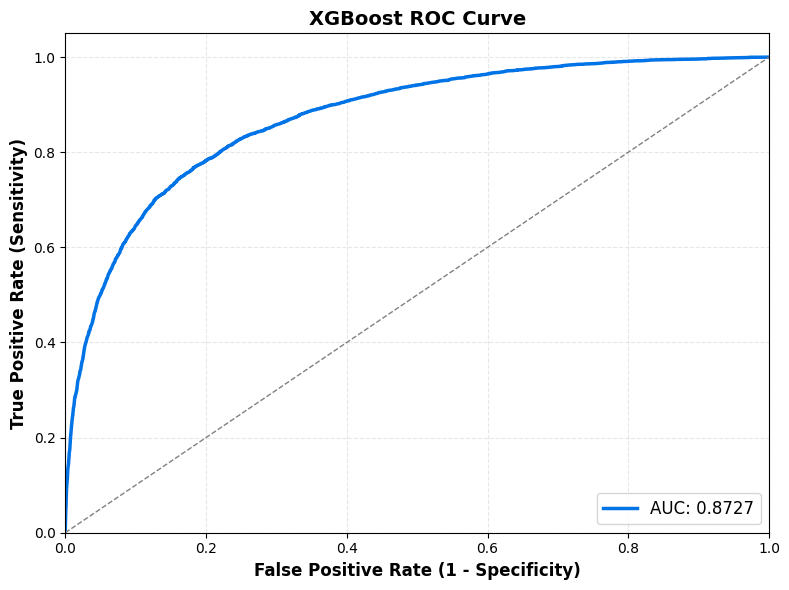

In [114]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# 1. Binarize true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = model.predict_proba(X_test)

# 2. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3. Macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

# 4. Plot styled like Random Forest
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='#0073e6', lw=2.5, label=f'AUC: {macro_auc:.4f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight='bold', fontsize=12)
plt.title('XGBoost ROC Curve', fontsize=14, fontweight='bold')

plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [115]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np

# Model Evaluation Metrics
auc = roc_auc_score(y_test, y_proba, multi_class='ovr') # We add multi_class='ovr' or ='ovo' as our target variable has more than 2 classes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Summary
print("\nFinal Tuned Model Performance")
print(f"AUC Score          : {auc:.4f}")
print(f"Accuracy Score     : {accuracy:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = sorted(np.unique(y_test))

conf_df = pd.DataFrame(
    data=conf_matrix,
    index=[f"Actual {label}" for label in class_labels],
    columns=[f"Predicted {label}" for label in class_labels]
)

print("\nLabeled Confusion Matrix:")
display(conf_df)  # or print(conf_df) if display() is not available

# Sensitivity (Recall) and Specificity per class
sensitivities = {}
specificities = {}

for i, label in enumerate(class_labels):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivities[label] = round(sensitivity, 4)
    specificities[label] = round(specificity, 4)

print("\nSensitivity (Recall) per class:")
for label, value in sensitivities.items():
    print(f"Class {label}: {value}")

print("\nSpecificity per class:")
for label, value in specificities.items():
    print(f"Class {label}: {value}")



Final Tuned Model Performance
AUC Score          : 0.8727
Accuracy Score     : 0.6621
Precision          : 0.6633
Recall             : 0.6621
F1 Score           : 0.6624

Labeled Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,1817,291,429,240
Actual 1,335,1998,194,250
Actual 2,476,145,1658,498
Actual 3,268,215,412,1882



Sensitivity (Recall) per class:
Class 0: 0.6543
Class 1: 0.7195
Class 2: 0.597
Class 3: 0.6777

Specificity per class:
Class 0: 0.8705
Class 1: 0.9219
Class 2: 0.8758
Class 3: 0.8814


# Saving Final Results - Predictions + Features

In [116]:
# Retrieving the Test set with the label

test_data_with_labels = X_test.copy()
test_data_with_labels['Actual_Label'] = y_test.values

test_data_with_labels.head()

,doctor_recc_h1n1,doctor_recc_seasonal,health_insurance,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_concern,h1n1_knowledge,chronic_med_condition,age_group_18 - 34 Years,...,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_= $75,000, Above Poverty","income_poverty_ $75,000",income_poverty_Below Poverty,Actual_Label
18922,0,1,1,3,1,2,1,1,1,False,...,True,False,False,False,True,False,True,False,False,2
3865,0,0,0,4,5,2,3,1,0,False,...,False,False,False,True,True,False,False,True,False,0
31326,1,1,1,2,5,4,2,2,0,False,...,False,False,False,True,True,False,True,False,False,3
30646,0,0,1,2,4,5,2,2,0,False,...,False,False,True,False,False,True,False,True,False,3
16942,0,0,1,4,2,2,2,1,0,False,...,False,False,False,True,True,False,False,True,False,1


In [117]:
from google.colab import files
import pandas as pd

# Define Excel filename
excel_filename = "H1N1_Model_Comparison_Results.xlsx"

# Export all model prediction results to Excel
with pd.ExcelWriter(excel_filename) as writer:
    full_results_25.to_excel(writer, sheet_name='25_Variables', index=False)
    full_results_14.to_excel(writer, sheet_name='14_Variables', index=False)
    full_results_tuned.to_excel(writer, sheet_name='Tuned_Model', index=False)
    test_data_with_labels.to_excel(writer, sheet_name='Test_Data_With_Labels', index=False)

# Trigger download to your computer
files.download(excel_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>